In [1]:
import numpy as np
import pandas as pd

# Loading the Dataset
file_path = "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Basic Cleaning
# Converting 'TotalCharges' Column to numeric, using coerce which will turn blank values into NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Checking for missing values in each column
print(df.isnull().sum())



customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [3]:
'''
 Since there are 11 missing values in totalcharges,
 replacing the missing values with 0 as they might be new customers
 (just signed up)
 '''
df['TotalCharges'].fillna(0, inplace=True)

/tmp/ipython-input-3648492977.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [4]:
# Dropping duplicate values/ rows based on customerID
df.drop_duplicates(subset='customerID', inplace=True)

# Creating a new column (Revenue per user) using the basic formula (Total Charge / Tenure)
df['RPU'] = df.apply(lambda x: x['TotalCharges'] / x['tenure'] if x['tenure'] > 0 else 0, axis=1)

# Checking again for any missing values
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
RPU                 0
dtype: int64


In [5]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... TechSupport  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...         Yes   
4                No     Fiber optic             No  ...          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No             

In [6]:
# Round RPU to 3 decimal places
df['RPU'] = df['RPU'].round(3)


In [7]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... TechSupport  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...         Yes   
4                No     Fiber optic             No  ...          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No             

In [8]:
# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Overall Churn Rate
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("Churn distribution (%):")
print(churn_rate)

Churn distribution (%):
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


/tmp/ipython-input-1125946282.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


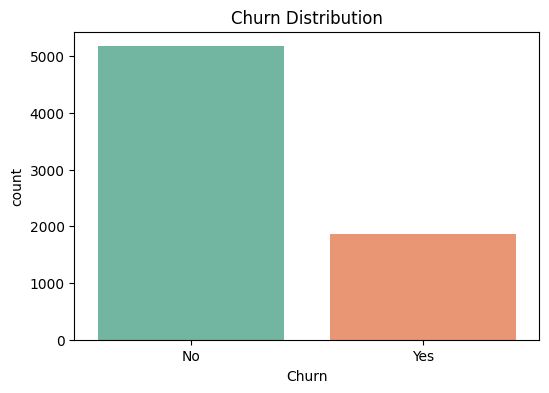

In [9]:
# Churn Distribution plot
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title("Churn Distribution")
plt.show()


/tmp/ipython-input-1012703969.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Churn', y='MonthlyCharges', data=df, palette='Set1')


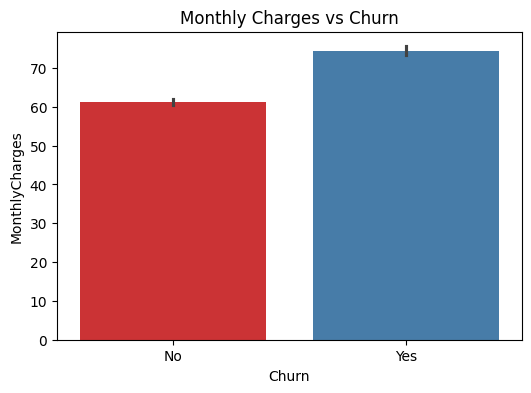

In [10]:
# Average Monthly Charges Plot by churn status
plt.figure(figsize=(6,4))
sns.barplot(x='Churn', y='MonthlyCharges', data=df, palette='Set1')
plt.title("Monthly Charges vs Churn")
plt.show()

# Seems like customers paying higher monthly bills are more likely to churn

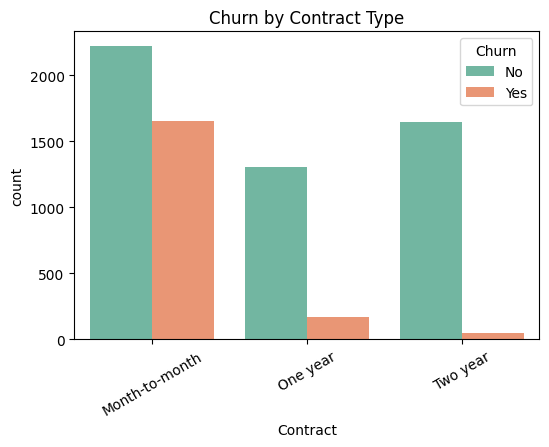

In [11]:
# Churn rate by Contract type
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2')
plt.title("Churn by Contract Type")
plt.xticks(rotation=30)
plt.show()

# People who are using month to month plans are more likely to churn

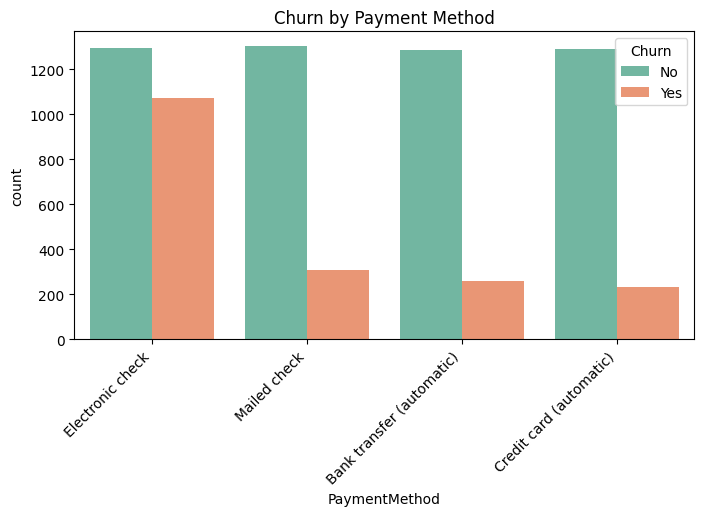

In [12]:
# Churn rate by Payment Method
plt.figure(figsize=(8,4))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='Set2')
plt.title("Churn by Payment Method")
plt.xticks(rotation=45, ha='right')
plt.show()

# Customers paying through electronic checks leave more often


/tmp/ipython-input-1424351330.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='RPU', data=df, palette='Set2')


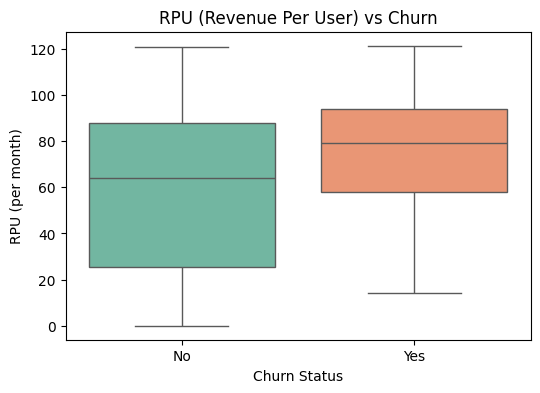

In [13]:
# RPU vs Churn Viz
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='RPU', data=df, palette='Set2')
plt.title("RPU (Revenue Per User) vs Churn")
plt.ylabel("RPU (per month)")
plt.xlabel("Churn Status")
plt.show()

# Customers who pay more each month (higher RPU) are more likely to churn

/tmp/ipython-input-2782509373.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby('TenureGroup')['Churn'].value_counts(normalize=True).unstack() * 100


Churn % by Tenure Group:
Churn               No        Yes
TenureGroup                      
0-12         52.321839  47.678161
12-24        71.289062  28.710938
24-36        78.365385  21.634615
36-48        80.971129  19.028871
48-60        85.576923  14.423077
60-72        93.390192   6.609808


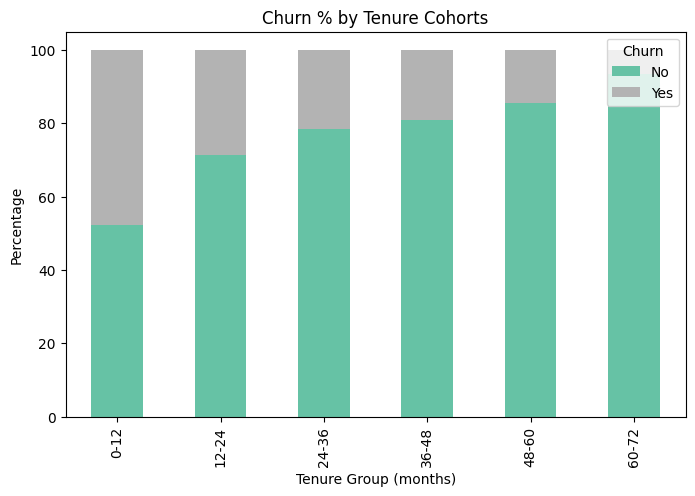

In [14]:
# Product KPI's

# Creating tenure cohorts
bins = [0, 12, 24, 36, 48, 60, 72]  # tenure in months
labels = ["0-12", "12-24", "24-36", "36-48", "48-60", "60-72"]
df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True)

# Calculating churn % within each cohort
tenure_churn = df.groupby('TenureGroup')['Churn'].value_counts(normalize=True).unstack() * 100
print("Churn % by Tenure Group:")
print(tenure_churn)

# Plot churn by tenure group
tenure_churn.plot(kind='bar', stacked=True, figsize=(8,5), colormap="Set2")
plt.title("Churn % by Tenure Cohorts")
plt.ylabel("Percentage")
plt.xlabel("Tenure Group (months)")
plt.legend(title="Churn", loc="upper right")
plt.show()

Number of Services Subscribed:
NumServices
0    2219
1     966
2    1033
3    1118
4     852
5     571
6     284
Name: count, dtype: int64

Churn % by Number of Services:
Churn               No        Yes
NumServices                      
0            78.593961  21.406039
1            54.244306  45.755694
2            64.181994  35.818006
3            72.629696  27.370304
4            77.699531  22.300469
5            87.565674  12.434326
6            94.718310   5.281690


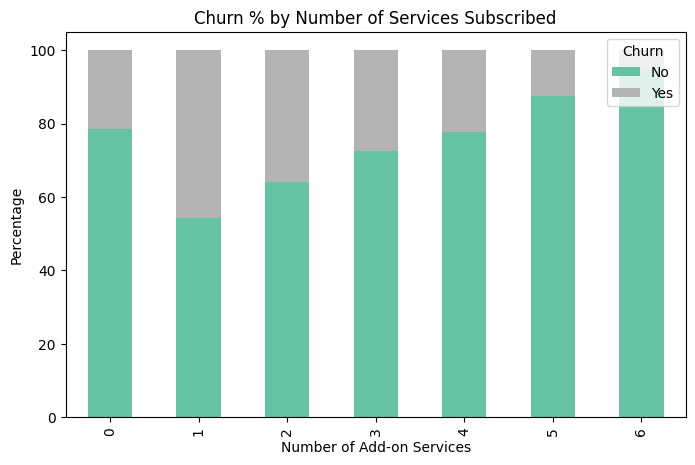

In [15]:
# List of add-on service columns
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a new column: count of services subscribed per customer
df['NumServices'] = df[services].apply(lambda row: sum(row == 'Yes'), axis=1)

# Check distribution of number of services
service_counts = df['NumServices'].value_counts().sort_index()
print("Number of Services Subscribed:")
print(service_counts)

# Average churn rate by number of services
stickiness_churn = df.groupby('NumServices')['Churn'].value_counts(normalize=True).unstack() * 100
print("\nChurn % by Number of Services:")
print(stickiness_churn)

# Plot churn vs number of services
stickiness_churn.plot(kind='bar', stacked=True, figsize=(8,5), colormap="Set2")
plt.title("Churn % by Number of Services Subscribed")
plt.ylabel("Percentage")
plt.xlabel("Number of Add-on Services")
plt.legend(title="Churn", loc="upper right")
plt.show()

Churn % by Contract Type:
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


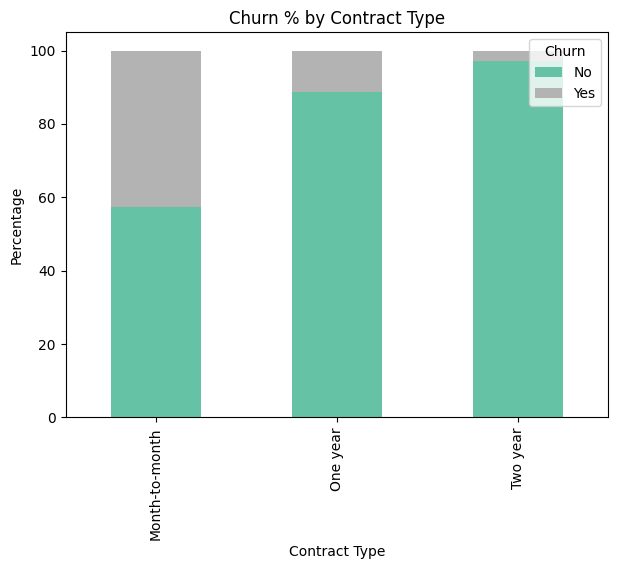

In [16]:
# Calculate churn % for each contract type
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100

print("Churn % by Contract Type:")
print(contract_churn)

# Plot churn % by contract type
contract_churn.plot(kind='bar', stacked=True, figsize=(7,5), colormap="Set2")
plt.title("Churn % by Contract Type")
plt.ylabel("Percentage")
plt.xlabel("Contract Type")
plt.legend(title="Churn", loc="upper right")
plt.show()

# KPI Analysis / Observations



*   Most customers leave in the first 12 months.
*   Customers with only 1 service churn the most.


*  Month-to-month users leave often.



In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

data = df.copy()

# Setting the target column
data['Churn'] = data['Churn'].map({'Yes':1 , 'No':0})

#One hot encoding to handle categorical variables
X = data.drop(['customerID', 'Churn'], axis = 1)
X = pd.get_dummies(X, drop_first = True)
y = data['Churn']

#Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

# Prediction
y_pred = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))


Logistic Regression Results:
Accuracy: 0.7402413058907026
F1-score: 0.6203319502074689


In [19]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [20]:
# See the features which actually effect the churn rate
feature_names = X.columns
coefficients = log_reg.coef_[0]

log_reg_features = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sorting by absolute coefficient value (strongest effects first)
log_reg_features['AbsCoeff'] = log_reg_features['Coefficient'].abs()
log_reg_features = log_reg_features.sort_values(by='AbsCoeff', ascending=False)

print("Top 5 features from Logistic Regression:")
print(log_reg_features.head(5))


Top 5 features from Logistic Regression:
                        Feature  Coefficient  AbsCoeff
1                        tenure    -1.776983  1.776983
2                MonthlyCharges    -0.999806  0.999806
36            TenureGroup_60-72     0.991850  0.991850
12  InternetService_Fiber optic     0.778069  0.778069
27            Contract_Two year    -0.660331  0.660331


In [21]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))

Random Forest Results:
Accuracy: 0.7863733144073811
F1-score: 0.5460030165912518


In [22]:
# Feature importance
rf_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 5 Features from Random Forest:")
print(rf_importances.head(5))


Top 5 Features from Random Forest:
              Feature  Importance
3        TotalCharges    0.134928
1              tenure    0.133734
4                 RPU    0.113215
2      MonthlyCharges    0.112611
27  Contract_Two year    0.055577


In [23]:
# A/B Testing

import pandas as pd
from scipy.stats import chi2_contingency

# Contract Type vs Churn
cont_contract = pd.crosstab(df['Contract'], df['Churn'])
chi2_con, p_con, dof_con, exp_con = chi2_contingency(cont_contract)

print("Chi-Square Test: Contract Type vs Churn")
print("Contingency Table:\n", cont_contract)
print("p-value:", p_con)
if p_con < 0.05:
    print("Contract type affects churn\n")
else:
    print("No significant difference detected\n")

# Payment Method vs Churn

df['PaymentGroup'] = df['PaymentMethod'].apply(
    lambda x: 'Electronic check' if x == 'Electronic check' else 'Auto-pay'
)

cont_payment = pd.crosstab(df['PaymentGroup'], df['Churn'])
chi2_pay, p_pay, dof_pay, exp_pay = chi2_contingency(cont_payment)

print("Chi-Square Test: Payment Method vs Churn")
print("Contingency Table:\n", cont_payment)
print("p-value:", p_pay)
if p_pay < 0.05:
    print("Payment method affects churn")
else:
    print("No significant difference detected")


Chi-Square Test: Contract Type vs Churn
Contingency Table:
 Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48
p-value: 5.863038300673391e-258
Contract type affects churn

Chi-Square Test: Payment Method vs Churn
Contingency Table:
 Churn               No   Yes
PaymentGroup                
Auto-pay          3880   798
Electronic check  1294  1071
p-value: 2.5280301640753998e-141
Payment method affects churn


In [24]:
# Save cleaned dataset to CSV
df.to_csv("Cleaned_Telco_Churn.csv", index=False)